### Imports usados

In [295]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import time as t

#### Função sin(t²)

In [296]:
def func(x):
    return m.sin(x**2)

### Parâmetros da simulação

In [297]:
# interval
a = 0
b = 20

# space between points
h = 1

print("Step: ", h)
print("Interval: [{0}, {1}]".format(a, b))
print("Number of points: ", int((b - a)/h))


Step:  0.1
Interval: [0, 20]
Number of points:  200


### Método dos retângulos

In [298]:
def retangle_method(func, a, b, h):
    # number of points in interval
    N = int((b - a)/h)

    # sum of all points with a h step
    result = 0
    for i in range(N -1):
        result += func(a + i * h)

    # return the sum multiplied by space between points
    return result * h

# calculate the execution time and the result of the integral
mediam = 0
value_retangle = 0
for i in range(10):
    start_time = t.time()
    value_retangle = retangle_method(func, a, b, h)
    mediam += (t.time() - start_time)*0.1

print("Execution time: {0:.6f}s".format(mediam))
print("Retangle method: {0:.5f}".format(value_retangle))


Execution time: 0.000034s
Retangle method: 0.64021


### Método dos trapézios

In [299]:
def trapeze_method(fun, a, b, h):
    # number of points in interval
    N = int((b - a)/h)

    # sum all points with a space between points
    result = 0
    for i in range(1, N -1):
        result += fun(a + i * h) * 2

    # sum with the first and last point
    result += (fun(a) + fun(b))

    # multiply by the space between points
    return result * h/2

# calculate the execution time and the result of the integral
mediam = 0
value_trapeze = 0
for i in range(10):
    start_time = t.time()
    value_trapeze = trapeze_method(func, a, b, h)
    mediam += (t.time() - start_time)*0.1

print("Execution time: {0:.6f}s".format(mediam))
print("Trapeze method: {0:.5f}".format(value_trapeze))


Execution time: 0.000054s
Trapeze method: 0.59767


### Método de Simpson

In [300]:
def simpson_method(func, a, b, h):
    # number of points in interval 
    N = int((b - a)/h)

    # sum all odd points
    result = 0
    for i in range(1, N - 1, 2):
        result += 4 * func(a + i * h)

    # sum all even points
    for i in range(2, N - 2, 2):
        result += 2 * func(a + i * h)

    # sum the first and last points
    result += func(a) + func(b)
    
    # multiply by the space between points
    return result * h/3

# calculate the execution time and the result of the integral
mediam = 0
value_simpson = 0
for i in range(10):
    start_time = t.time()
    value_simpson = simpson_method(func, a, b, h)
    mediam += (t.time() - start_time)*0.1

print("Execution time: {0:.6f}s".format(mediam))
print("Simpson method: {0:.5f}".format(value_simpson))
    

Execution time: 0.000037s
Simpson method: 0.99788


### Diferença entre os métodos

In [301]:
# calculate the exact value of the integral
exact_1 = value_retangle - value_simpson
exact_2 = value_trapeze - value_simpson
exact_3 = value_retangle - value_trapeze

print("Exact value (retangle - simpson): {0:.10f}".format(exact_1))
print("Exact value (trapeze - simpson): {0:.10f}".format(exact_2))
print("Exact value (retangle - trapeze): {0:.10f}".format(exact_3))

# calculate the relative diference between the exact value and the calculated value
relative_1 = abs(exact_1/value_simpson)
relative_2 = abs(exact_2/value_simpson)
relative_3 = abs(exact_3/value_trapeze)

print("Relative difference (retangle - simpson): {0:.10f}".format(relative_1))
print("Relative difference (trapeze - simpson): {0:.10f}".format(relative_2))
print("Relative difference (retangle - trapeze): {0:.10f}".format(relative_3))

Exact value (retangle - simpson): -0.3576683509
Exact value (trapeze - simpson): -0.4002143189
Exact value (retangle - trapeze): 0.0425459680
Relative difference (retangle - simpson): 0.3584272976
Relative difference (trapeze - simpson): 0.4010635451
Relative difference (retangle - trapeze): 0.0711865961


### Plota a função

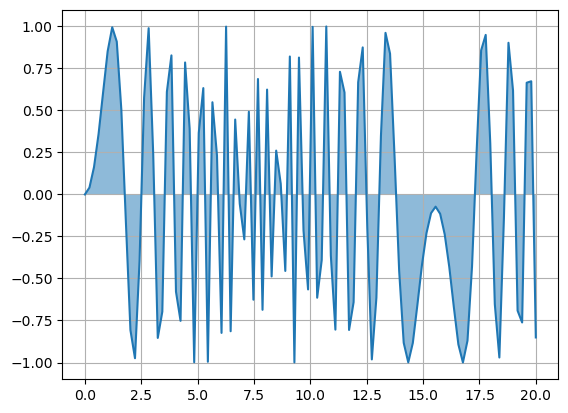

In [302]:
# plot the function
x = np.linspace(a, b, 100)
y = [func(i) for i in x]

plt.plot(x, y)
plt.fill_between(x, y, where=(x >= a) & (x <= b), alpha=0.5)
plt.grid()
plt.show()
